<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv("bike_sharing_data.txt") # Load the data
data.head() # Ascertain it loaded properly

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info() # Ascertain it loaded properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

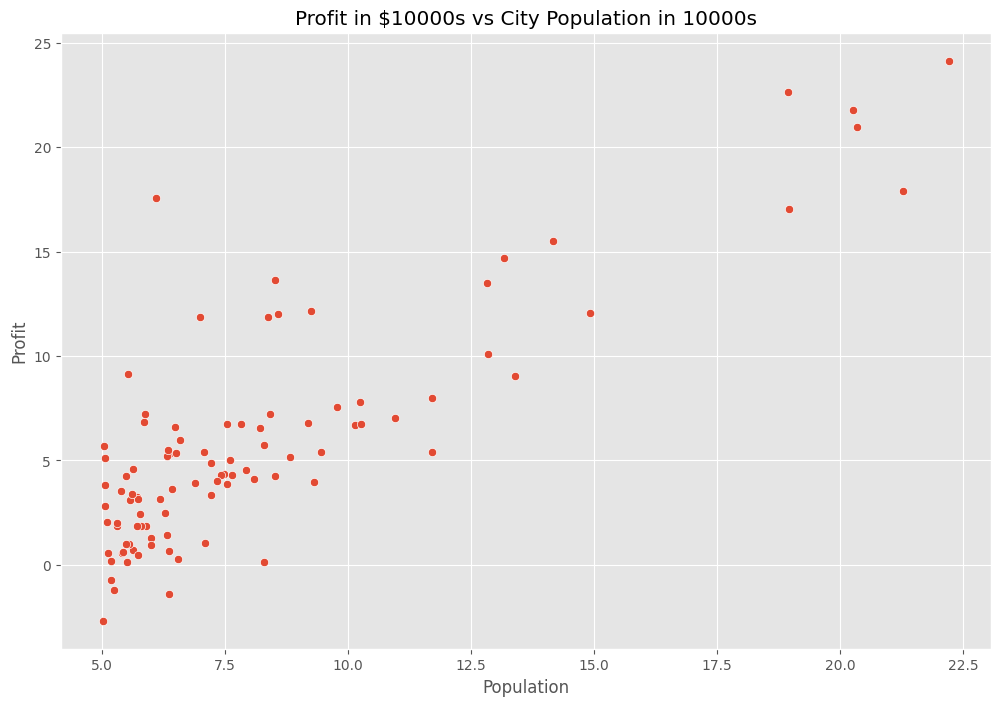

In [6]:
ax = sns.scatterplot(x="Population", y="Profit", data=data) # Visualize data with a scatterplot since we have only 2 variables
ax.set_title("Profit in $10000s vs City Population in 10000s"); # Title of plot

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [7]:
def cost_function(X, y, theta): # Feature matrix, target vector, parameter vector
    m = len(y) # Number of examples in the dataset
    y_pred = X.dot(theta) # Predicted values; the hypothesis part of the equation above
    error = (y_pred - y) ** 2 # The difference between the predicted values and the reference values; The squared part of the equation

    return 1 / (2 * m) * np.sum(error) # The complete cost function

In [10]:
m = data.Population.values.size # Number of population values
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1) # Population values
y = data.Profit.values.reshape(m, 1) # Profit values; Reshape so that matrix multiplication is valid
theta = np.zeros((2, 1)) # Zeros for the sake of testing

cost_function(X, y, theta) # Should return 32.07

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [11]:
def gradient_descent(X, y, theta, alpha, iterations): # Feature matrix, target vector, parameter vector, learning rate, iterations
    m = len(y) # Number of examples in the dataset
    costs = [] # History of computed costs by the function

    for i in range(iterations):
        y_pred = X.dot(theta) # Predicted values
        error = np.dot(X.transpose(), (y_pred - y)) # The difference between the predicted values and the reference values; The squared part of the equation
        theta -= alpha * 1 / m * error # Parameter vector
        costs.append(cost_function(X, y, theta)) # Update history of computed costs
        
    return theta, costs

In [15]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000) # Values steadily decrease and converge (if implemented correctly)
print("h(x) = {0} + {1}x1".format(str(round(theta[0, 0], 2)),
                                  str(round(theta[1, 0], 2)))) # Our hypothesis

h(x) = -3.9 + 1.19x1


In [16]:
print(costs)

[4.476971376542307, 4.4769713765402654, 4.47697137653823, 4.476971376536202, 4.4769713765341805, 4.476971376532168, 4.4769713765301615, 4.476971376528163, 4.47697137652617, 4.476971376524186, 4.476971376522209, 4.476971376520238, 4.476971376518274, 4.4769713765163175, 4.476971376514369, 4.476971376512426, 4.476971376510492, 4.476971376508564, 4.476971376506643, 4.4769713765047285, 4.476971376502821, 4.47697137650092, 4.4769713764990255, 4.476971376497141, 4.47697137649526, 4.4769713764933865, 4.476971376491519, 4.476971376489661, 4.476971376487806, 4.47697137648596, 4.47697137648412, 4.476971376482288, 4.476971376480461, 4.476971376478641, 4.476971376476828, 4.476971376475021, 4.4769713764732195, 4.476971376471426, 4.476971376469638, 4.476971376467858, 4.476971376466083, 4.476971376464315, 4.4769713764625525, 4.4769713764607975, 4.476971376459049, 4.476971376457306, 4.476971376455569, 4.476971376453839, 4.476971376452115, 4.476971376450397, 4.4769713764486845, 4.476971376446979, 4.4769

### Task 6: Visualising the Cost Function $J(\theta)$
---

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

In [26]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection="3d")

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap="viridis")
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("J(\Theta)$")
ax.view_init(30, 330)

plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1200x800 with 0 Axes>

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 8: Training Data with Linear Regression Fit
---

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$